In [196]:
import matplotlib.pyplot as plt
import anndata as adata
import scanpy as sc
from wmb import cemba, mm10
from ALLCools.mcds import MCDS
from ALLCools.clustering import significant_pc_test
from ALLCools.plot import *
import pandas as pd
from harmonypy import run_harmony

In [197]:
adata_concat = sc.read_h5ad('/data2st1/junyi/output/atacsc-3region-pseudo-clusteringlamb0.1_nclust8.harmony.h5ad')


In [198]:
meta_sc = pd.read_csv('/data2st1/junyi/output/Brain.3regions.MetaData.csv.gz', index_col=0, compression='gzip')

/tmp/ipykernel_3853701/2724994593.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_sc = pd.read_csv('/data2st1/junyi/output/Brain.3regions.MetaData.csv.gz', index_col=0, compression='gzip')


In [199]:
meta_atac = pd.read_csv('/data2st1/junyi/output/ATAC.3regions.MetaData.csv.gz', index_col=0)

In [200]:
meta_atac

sample  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1                  MC50B_AMY_p40   
...                                                         ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1  WT_W26_0_2_Perfrontal   

                                                                    sample_barcode  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1                  MC50B_AMY_p40:AAACGAAAGAGTCCGA-1   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1                  MC50B_AMY_p40:AAACGAAAGCAACGGT-1   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1                  MC50B_AMY_p40:AAACGAAAGCTACGTT-1   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1                  MC50B_AMY_p40:AAACGAAAGCTGAATA-1   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1                  MC50B_AMY_p40:AAACGAAAGGTCTTGT-1   
...                                                                            ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1  WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1   

                                                                                  obs_names  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
...                                                                                     ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   

                                         celltype.L2.p celltype.L1.p  leiden  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1               Unknown       Unknown       4   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1               Unknown       Unknown       3   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1               Unknown       Unknown       3   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1               Unknown       Unknown       0   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1               Unknown       Unknown       4   
...                                                ...           ...     ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1           MOL     OPC-Oligo       6   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1         L6 CT        Neuron       5   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1       Unknown       Unknown       1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1       Unknown     OPC-Oligo      14   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1         L6 CT        Neuron      14   

                                         celltype.L1.GBoost celltype.L1.tab  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1      

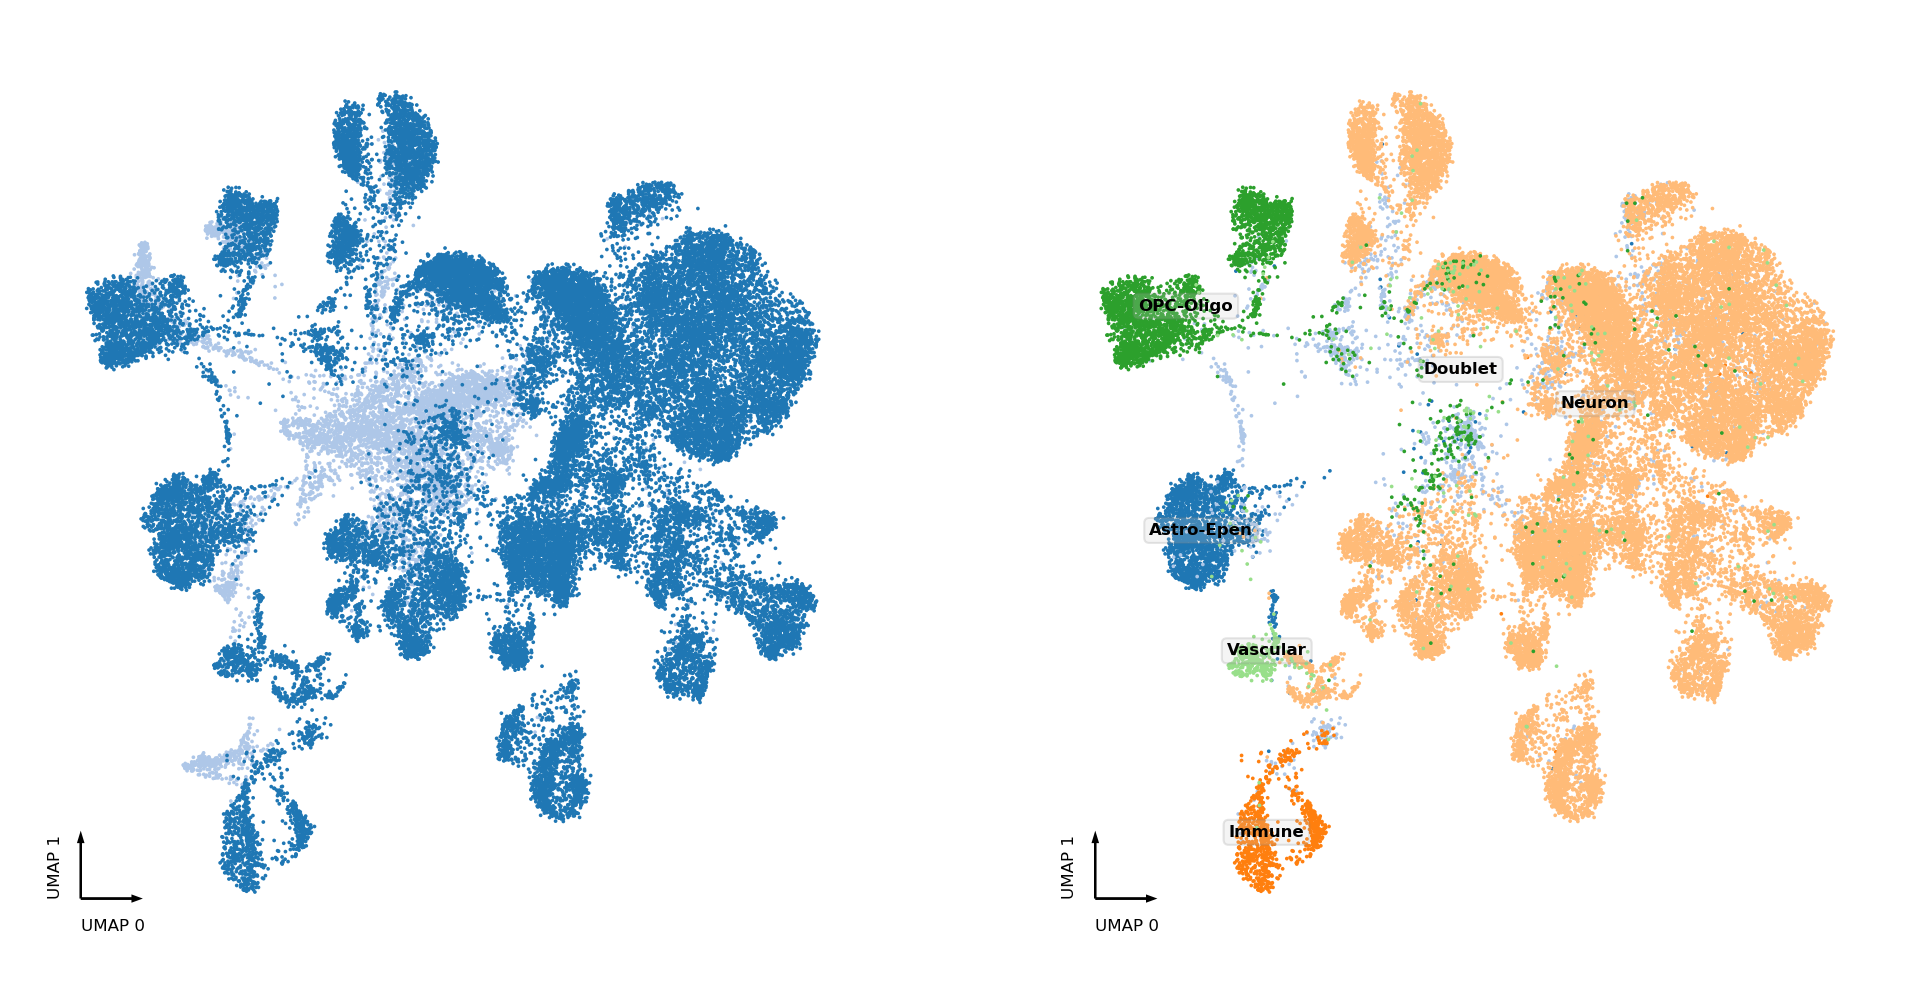

In [201]:
fig, axes = plt.subplots(figsize=(8, 4), dpi=300, ncols=2)
ax = axes[0]
categorical_scatter(ax=ax, data=adata_concat, hue='batch', palette='tab20')
ax = axes[1]
categorical_scatter(ax=ax, data=adata_concat, hue='celltype.L1', palette='tab20',text_anno='celltype.L1')

/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


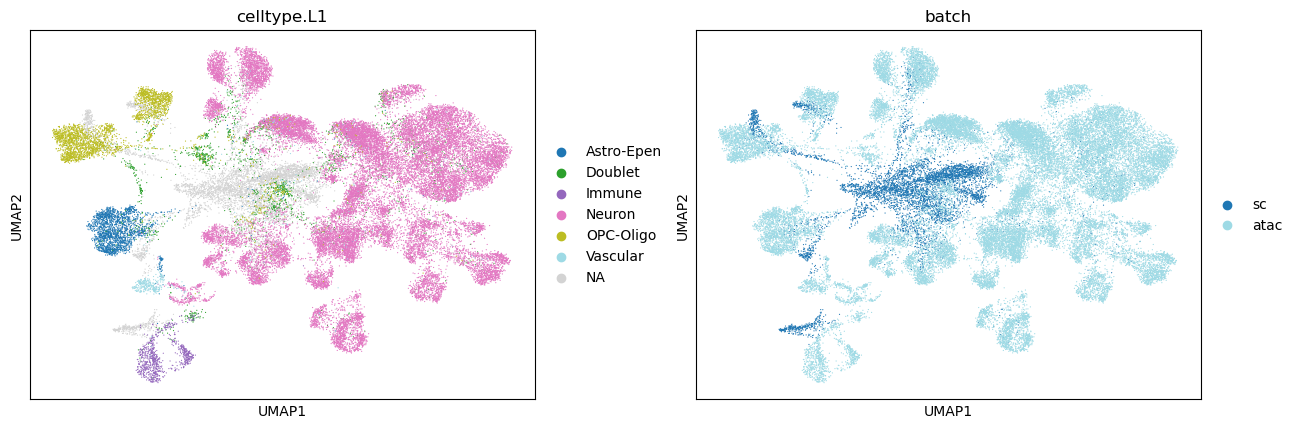

In [202]:
sc.pl.umap(adata_concat, color=['celltype.L1', 'batch'], ncols=2, palette='tab20', wspace=0.2)

In [205]:
adata_concat[adata_concat.obs.batch=='sc']

View of AnnData object with n_obs × n_vars = 6294 × 2980
    obs: 'n_cells', 'leiden', 'n_counts', 'leiden_snap', 'celltype.L1', 'batch'
    var: 'highly_variable', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'chr-0', 'gene_name-0', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'feature_types-1', 'genome-1', 'mt-1', 'gane_name-1'
    uns: 'leiden', 'neighbors', 'pca', 'umap', 'celltype.L1_colors', 'batch_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [242]:
adata_atacpse = sc.read_h5ad('/data2st1/junyi/output/ATAC.PseudoCellAdata.3regions.h5ad')

In [263]:
adata_atacpse.obsm['X_umap'] = adata_concat[adata_concat.obs.batch=='sc'].obsm['X_umap']

In [244]:
adata_atacpse.var['gene_id'] = adata_atacpse.var_names

In [245]:
adata_atacpse.var.gene_name = adata_atacpse.var.gene_name.astype(str)

In [246]:
adata_atacpse.var.set_index('gene_name', inplace=True)

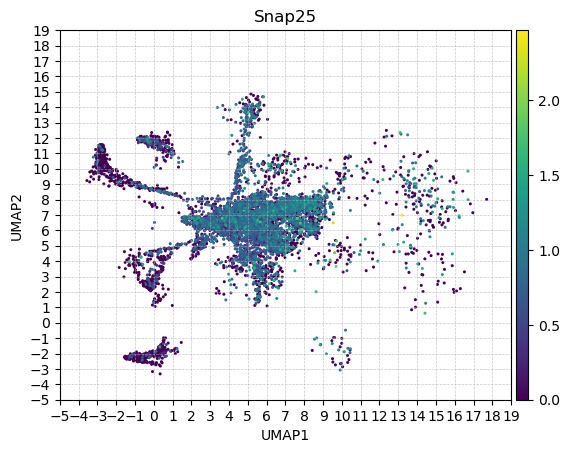

In [247]:
import numpy as np
ax = sc.pl.umap(adata_atacpse, color=['Snap25'], ncols=2, palette='tab20',frameon=True,show=False)

ax.set_xticks(np.arange(-5, 20, 1))  # Set custom x-axis ticks
ax.set_yticks(np.arange(-5, 20, 1))  # Set custom y-axis ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


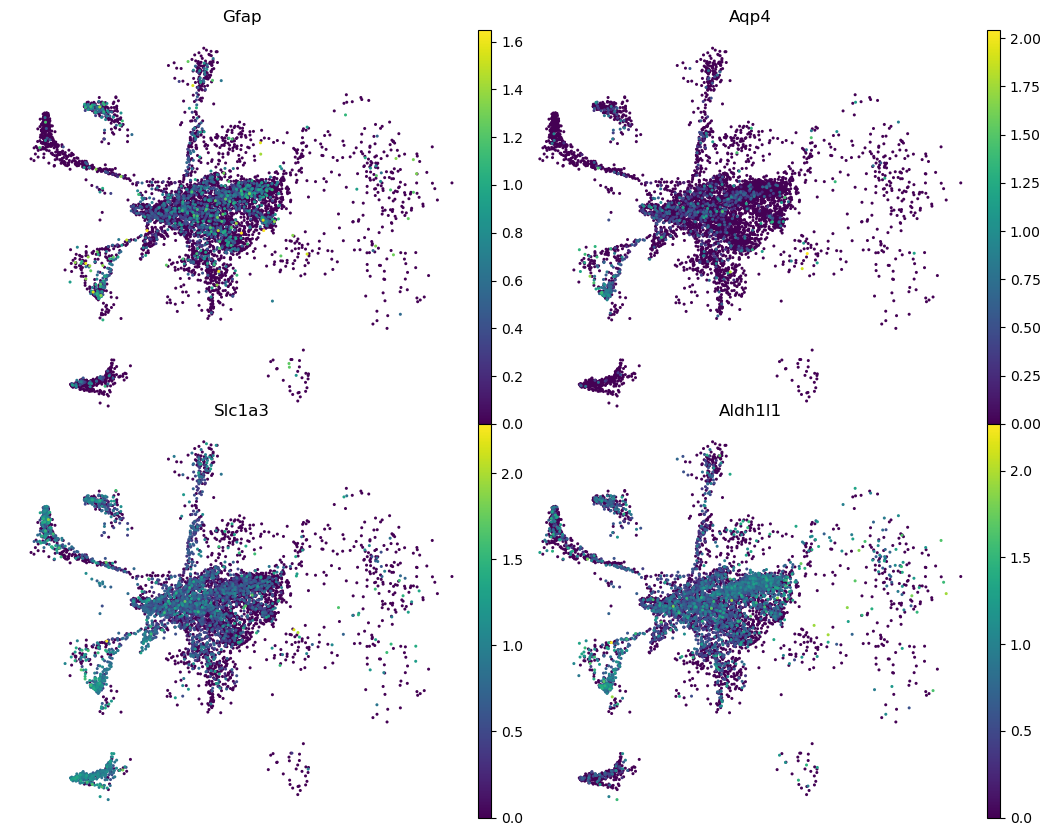

In [212]:
sc.pl.umap(adata_atacpse, color=['Gfap','Aqp4','Slc1a3','Aldh1l1'], ncols=2, palette='tab20', wspace=0,hspace=0,frameon=False,legend_loc=None)

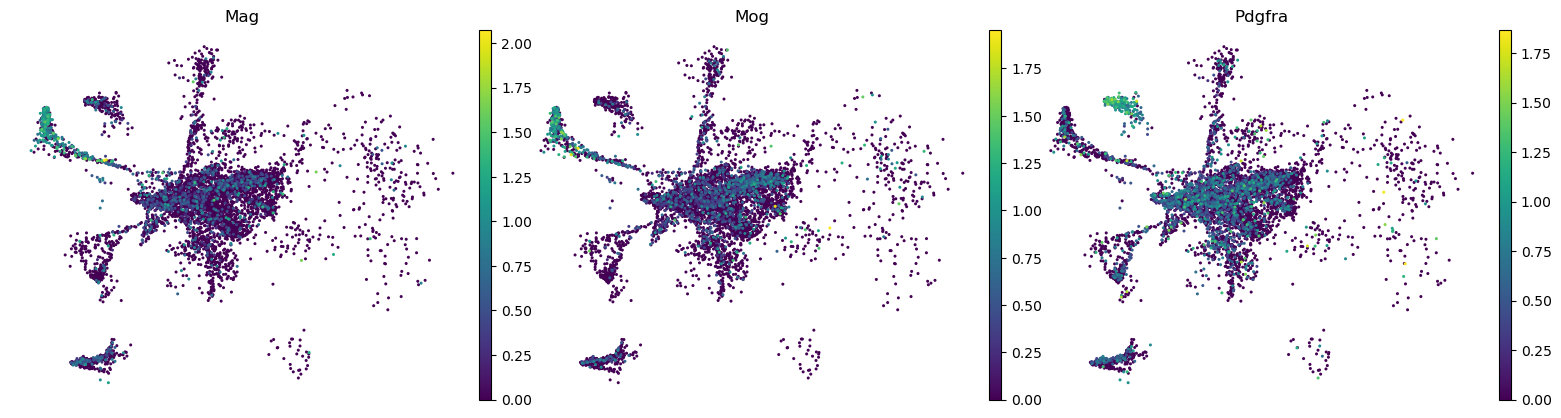

In [ ]:
sc.pl.umap(adata_atacpse, color=['Mag','Mog','Pdgfra'], ncols=3, palette='tab20', wspace=0,hspace=0,frameon=False,legend_loc=None)

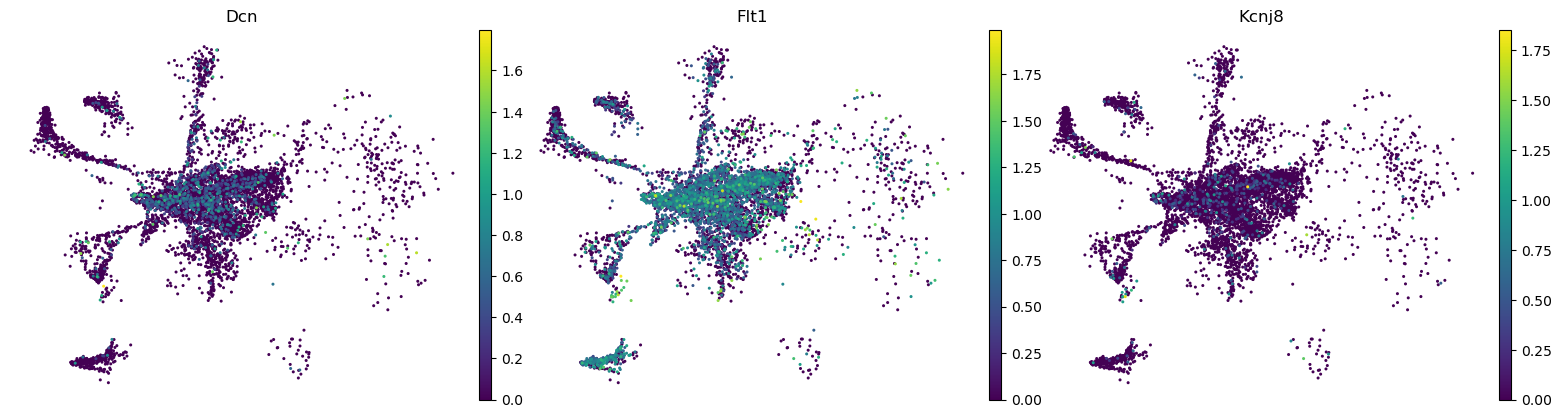

In [ ]:
sc.pl.umap(adata_atacpse, color=['Dcn','Flt1','Kcnj8'], ncols=3, palette='tab20', wspace=0,hspace=0,frameon=False,legend_loc=None)

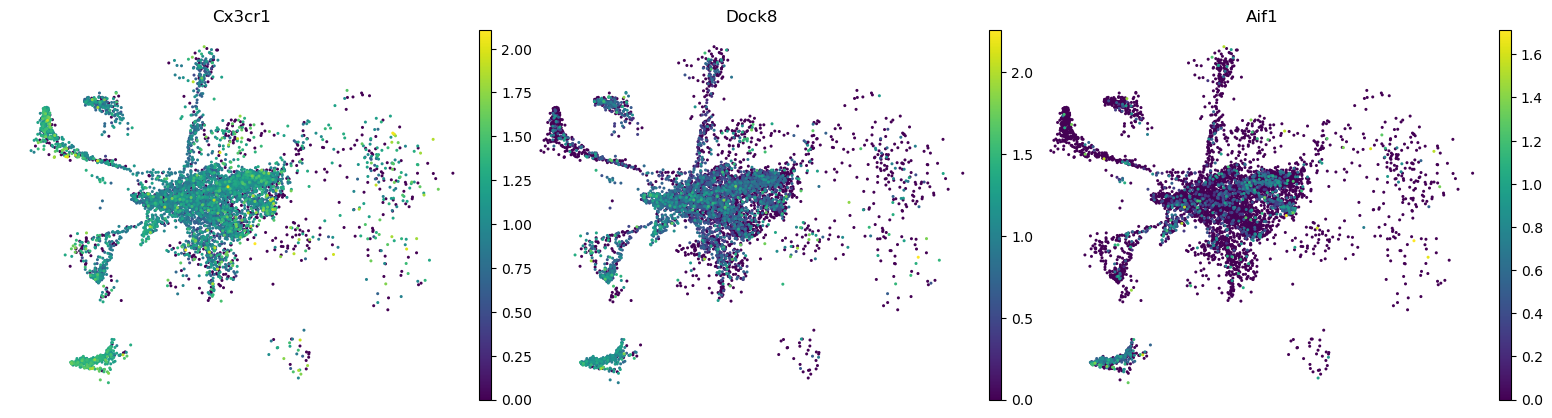

In [ ]:
sc.pl.umap(adata_atacpse, color=['Cx3cr1','Dock8','Aif1'], ncols=3, palette='tab20', wspace=0,hspace=0,frameon=False,legend_loc=None)

/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


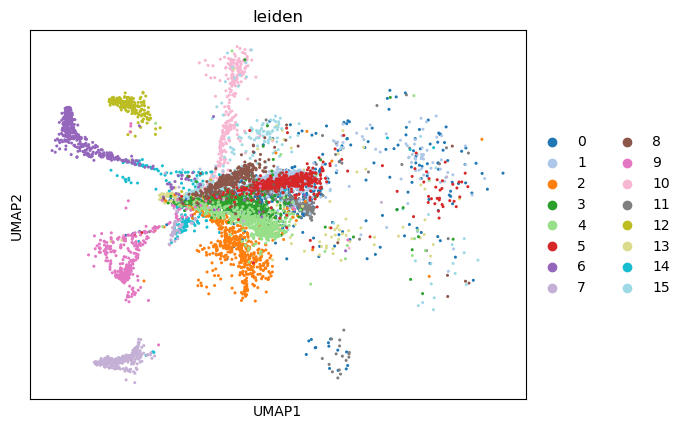

In [213]:
ax = sc.pl.umap(adata_atacpse, color=['leiden'], ncols=2, palette='tab20',frameon=True,show=False)


/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'celltype.L1'}, xlabel='UMAP1', ylabel='UMAP2'>

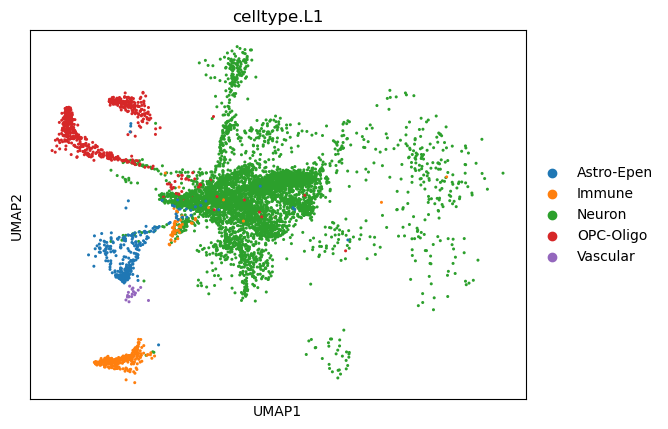

In [248]:
adata_atacpse.obs['celltype.L1'] = 'Neuron'
adata_atacpse.obs.loc[adata_atacpse.obs.leiden=='9','celltype.L1'] =  'Astro-Epen'
adata_atacpse.obs.loc[adata_atacpse.obs.leiden=='12','celltype.L1'] =  'OPC-Oligo'
adata_atacpse.obs.loc[adata_atacpse.obs.leiden=='6','celltype.L1'] =  'OPC-Oligo'
adata_atacpse.obs.loc[adata_atacpse.obs.leiden=='7','celltype.L1'] =  'Immune'
adata_atacpse.obs.loc[adata_atacpse.obs.leiden=='7','celltype.L1'] =  'Immune'
condition = (adata_atacpse.obsm['X_umap'][:, 0] > -0.5) & (adata_atacpse.obsm['X_umap'][:, 0] < 1) & (adata_atacpse.obsm['X_umap'][:, 1] > 1) & (adata_atacpse.obsm['X_umap'][:, 1] < 2)
adata_atacpse.obs.loc[condition,'celltype.L1'] = 'Vascular'


sc.pl.umap(adata_atacpse, color=['celltype.L1'],frameon=True,show=False)


In [249]:
adata_concat.obs['celltype.L1'] = adata_concat.obs['celltype.L1'].astype(str)

In [250]:
adata_concat.obs['celltype.L1']

0::|0|0|0-0             Neuron
0::|0|0|1-0             Neuron
0::|0|1|0-0             Neuron
0::|0|1|1-0             Neuron
0::|0|2|0-0             Neuron
                        ...   
Vascular::|9|6|0-1    Vascular
Vascular::|9|6|1-1    Vascular
Vascular::|9|7-1      Vascular
Vascular::|9|8-1      Vascular
Vascular::|9|9-1      Vascular
Name: celltype.L1, Length: 42014, dtype: object

In [251]:
adata_atacpse.obs.index+"-0"

Index(['0::|0|0|0-0', '0::|0|0|1-0', '0::|0|1|0-0', '0::|0|1|1-0',
       '0::|0|2|0-0', '0::|0|2|1-0', '0::|0|2|2|0-0', '0::|0|2|2|1-0',
       '0::|0|3-0', '0::|0|4|0|0-0',
       ...
       '9::|8|4|1-0', '9::|8|5-0', '9::|9|0-0', '9::|9|1|0|0-0',
       '9::|9|1|0|1|0-0', '9::|9|1|0|1|1|0-0', '9::|9|1|0|1|1|1-0',
       '9::|9|1|1-0', '9::|9|2-0', '9::|9|3-0'],
      dtype='object', length=6294)

In [252]:
adata_atacpse.obs.index = adata_atacpse.obs.index+"-0"

In [274]:
adata_atacpse.obs["umap_pse0"] = adata_atacpse.obsm['X_umap'][:, 0].tolist()
adata_atacpse.obs["umap_pse1"] = adata_atacpse.obsm['X_umap'][:, 1].tolist()

In [280]:
adata_atacpse.obs['pseudo_group'] = adata_atacpse.obs.index.str.split('-').str[0]

In [282]:
adata_atacpse.obs

n_cells leiden     n_counts leiden_snap celltype.L1  \
0::|0|0|0-0             33      0  7662.962891           0      Neuron   
0::|0|0|1-0             23      0  8305.457031           0      Neuron   
0::|0|1|0-0             44      0  8817.022461           0      Neuron   
0::|0|1|1-0             28      0  8372.442383           0      Neuron   
0::|0|2|0-0             22      0  8726.166992           0      Neuron   
...                    ...    ...          ...         ...         ...   
9::|9|1|0|1|1|0-0       27      9  8656.449219           9  Astro-Epen   
9::|9|1|0|1|1|1-0       30      9  8649.303711           9  Astro-Epen   
9::|9|1|1-0              4      9  7352.259277           9  Astro-Epen   
9::|9|2-0               47      9  9012.060547           9  Astro-Epen   
9::|9|3-0               46      9  7507.080566           9  Astro-Epen   

                   umap_pse0  umap_pse1     pseudo_group  
0::|0|0|0-0        14.642858   5.989978        0::|0|0|0  
0::|0|0|1-0         7.232118   7.411891        0::|0|0|1  
0::|0|1|0-0         7.097650   7.439328        0::|0|1|0  
0::|0|1|1-0         6.014573   6.749790        0::|0|1|1  
0::|0|2|0-0         1.848530   5.222545        0::|0|2|0  
...                      ...        ...              ...  
9::|9|1|0|1|1|0-0  -0.223780   2.404028  9::|9|1|0|1|1|0  
9::|9|1|0|1|1|1-0  -0.156594   2.603206  9::|9|1|0|1|1|1  
9::|9|1|1-0        -0.395630   2.415482        9::|9|1|1  
9::|9|2-0          -0.219509   2.538290          9::|9|2  
9::|9|3-0          -0.316237   2.348776          9::|9|3  

[6294 rows x 8 columns]

In [287]:
meta_atac

sample  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1                  MC50B_AMY_p40   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1                  MC50B_AMY_p40   
...                                                         ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1  WT_W26_0_2_Perfrontal   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1  WT_W26_0_2_Perfrontal   

                                                                    sample_barcode  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1                  MC50B_AMY_p40:AAACGAAAGAGTCCGA-1   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1                  MC50B_AMY_p40:AAACGAAAGCAACGGT-1   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1                  MC50B_AMY_p40:AAACGAAAGCTACGTT-1   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1                  MC50B_AMY_p40:AAACGAAAGCTGAATA-1   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1                  MC50B_AMY_p40:AAACGAAAGGTCTTGT-1   
...                                                                            ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1  WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1  WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1   

                                                                                  obs_names  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1          /data8/hannan/data/snATAC_process/snATAC_01_ba...   
...                                                                                     ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1  /data8/hannan/data/snATAC_process/snATAC_01_ba...   

                                         celltype.L2.p celltype.L1.p  leiden  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1               Unknown       Unknown       4   
MC50B_AMY_p40:AAACGAAAGCAACGGT-1               Unknown       Unknown       3   
MC50B_AMY_p40:AAACGAAAGCTACGTT-1               Unknown       Unknown       3   
MC50B_AMY_p40:AAACGAAAGCTGAATA-1               Unknown       Unknown       0   
MC50B_AMY_p40:AAACGAAAGGTCTTGT-1               Unknown       Unknown       4   
...                                                ...           ...     ...   
WT_W26_0_2_Perfrontal:TTTGTGTTCCAACAAC-1           MOL     OPC-Oligo       6   
WT_W26_0_2_Perfrontal:TTTGTGTTCCGTACGG-1         L6 CT        Neuron       5   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTATCAT-1       Unknown       Unknown       1   
WT_W26_0_2_Perfrontal:TTTGTGTTCCTGACCT-1       Unknown     OPC-Oligo      14   
WT_W26_0_2_Perfrontal:TTTGTGTTCTGACTTT-1         L6 CT        Neuron      14   

                                         celltype.L1.GBoost celltype.L1.tab  \
MC50B_AMY_p40:AAACGAAAGAGTCCGA-1      

In [288]:
meta_atac.merge(adata_atacpse.obs, left_on='pseudo_group', right_on='pseudo_group',how='left').to_csv('output/ATAC.3regions.MetaData.labelled.csv.gz',compression='gzip')

In [254]:
adata_concat.obs.loc[adata_atacpse.obs.index,'celltype.L1']= adata_atacpse.obs.loc[adata_atacpse.obs.index,'celltype.L1']

/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


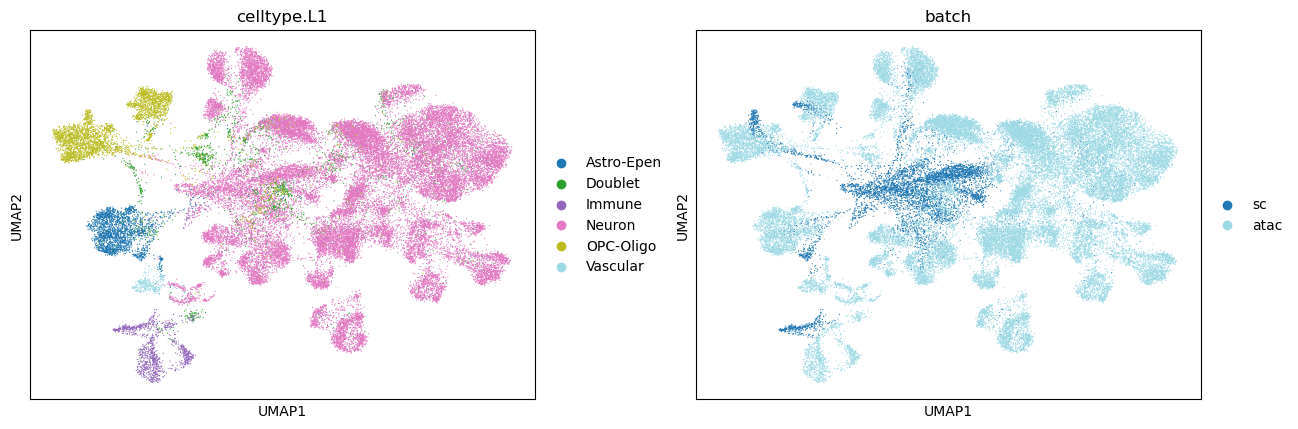

In [255]:
sc.pl.umap(adata_concat, color=['celltype.L1','batch'], ncols=2, palette='tab20', wspace=0.2)

In [159]:
marker_genes_dict = {
    "Neuron": ["Snap25", "Syt1", "Gad1", "Slc17a7"],
    "Astrocyte-Epen": ["Gfap", "Aqp4", "Slc1a3", "Aldh1l1"],
    "OPC-Oligo": ["Mag", "Mog", "Pdgfra", "Plp1"],
    "Vascular": ["Flt1", "Kcnj8", "Dcn"],
    "Immune": ["Cx3cr1", "Dock8"]
}


In [113]:
adata_atacpse.var_names_make_unique()

/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


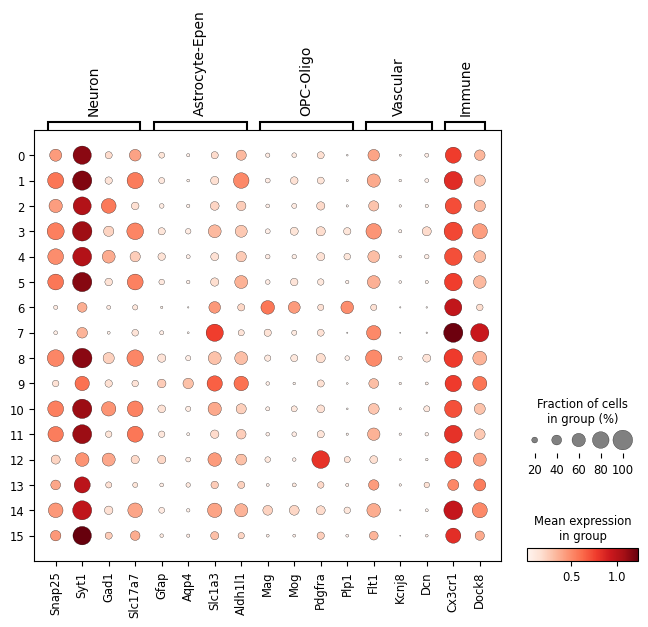

In [160]:
sc.pl.dotplot(adata_atacpse, marker_genes_dict, "leiden", dendrogram=False)


/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


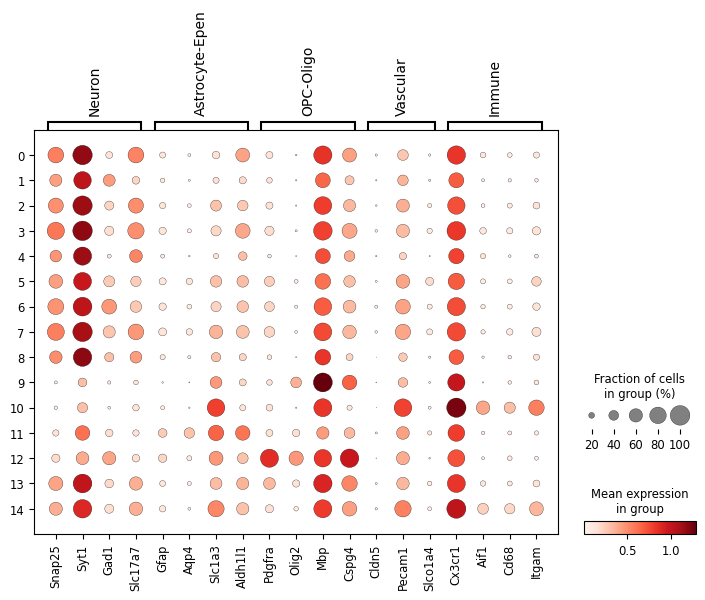

In [119]:
sc.pl.dotplot(test_adata, marker_genes_dict, "leiden", dendrogram=False)


In [75]:
adata_sc_train = adata_concat[adata_concat.obs['batch'] == 'atac']

In [78]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
y_train = adata_sc_train.obs['celltype.L1']
le = LabelEncoder()
y_train = le.fit_transform(y_train)
X_train = adata_sc_train.obsm['X_pca']

In [79]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [80]:
adata_sc_test = adata_concat[adata_concat.obs['batch'] != 'atac']
X_test = adata_sc_test.obsm['X_pca']
y_test = clf.predict(X_test)

In [81]:
y_test = le.inverse_transform(y_test)

In [82]:
adata_sc_test.obs['predicted_celltype'] = y_test

/tmp/ipykernel_3853701/1270472714.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sc_test.obs['predicted_celltype'] = y_test


In [178]:
adata_concat.obs['celltype.L2.p'] = adata_concat.obs['celltype.L2']

In [179]:
adata_concat.obs.loc[adata_sc_test.obs.index,'celltype.L2']=y_test

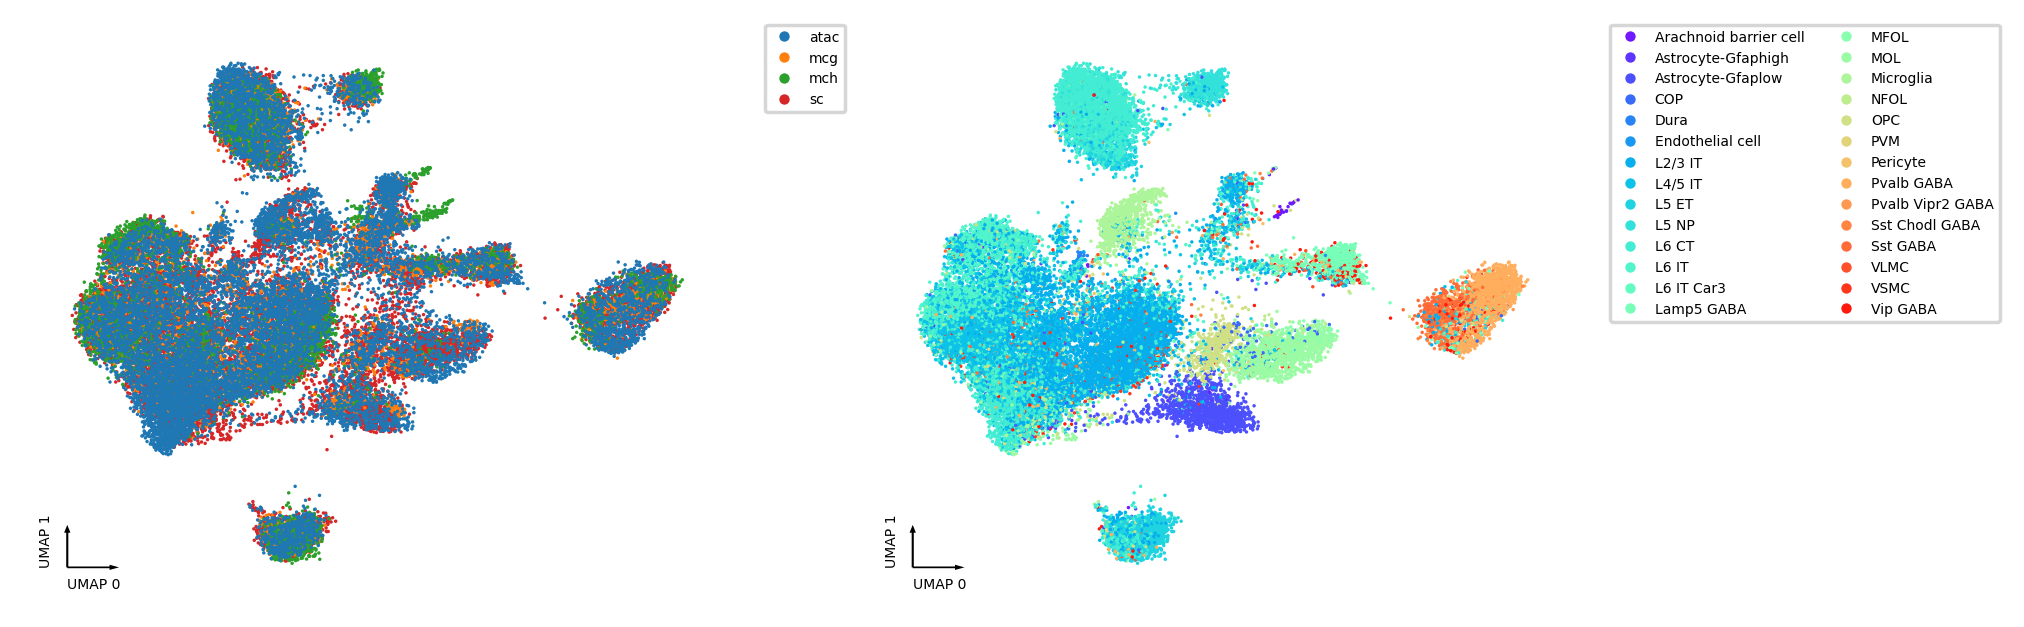

In [180]:
fig, axes = plt.subplots(figsize=(8, 3), dpi=250, ncols=2)

ax = axes[0]
categorical_scatter(ax=ax,
                    data=adata_concat,
                    hue='batch',
                    show_legend=True,
                    max_points=None,
                    s=1)

ax = axes[1]
categorical_scatter(ax=ax,
                    data=adata_concat,
                    hue='celltype.L2',
                    show_legend=True,
                    max_points=None,
                    s=1)

In [181]:
y_train = adata_sc_train.obs['celltype.L1']
le = LabelEncoder()
y_train = le.fit_transform(y_train)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [182]:
y_test = clf.predict(X_test)
y_test = le.inverse_transform(y_test)
adata_sc_test.obs['predicted_celltype'] = y_test

In [183]:
adata_concat.obs['celltype.L1.p'] = adata_concat.obs['celltype.L1']

In [184]:
adata_concat.obs.loc[adata_sc_test.obs.index,'celltype.L1']=y_test

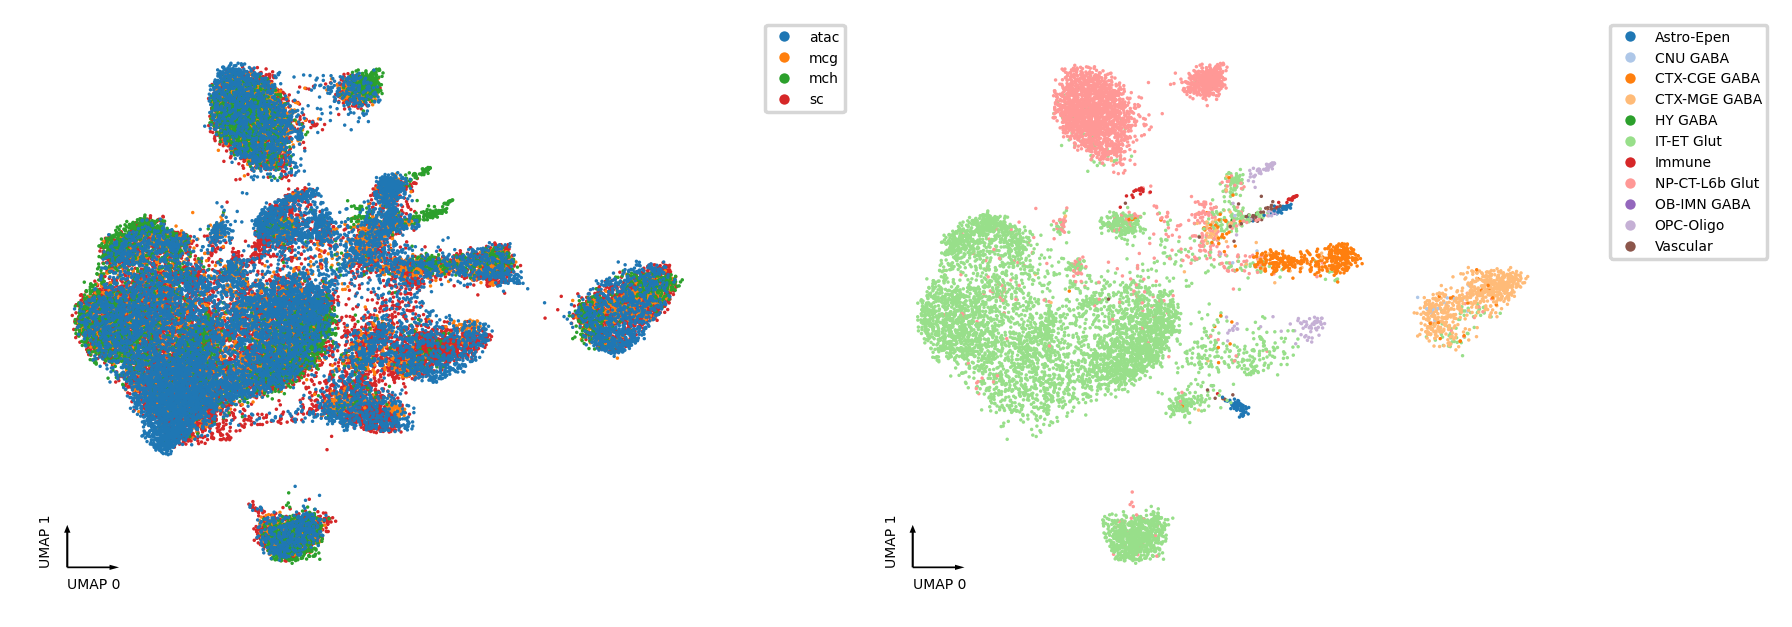

In [185]:
fig, axes = plt.subplots(figsize=(8, 3), dpi=250, ncols=2)

ax = axes[0]
categorical_scatter(ax=ax,
                    data=adata_concat,
                    hue='batch',
                    show_legend=True,
                    max_points=None,
                    s=1)

ax = axes[1]
categorical_scatter(ax=ax,
                    data=adata_concat,
                    hue='Class',
                    show_legend=True,
                    max_points=None,
                    s=1)

In [186]:
def dump_embedding(adata, name, n_dim=2):
    # put manifold coordinates into adata.obs
    for i in range(n_dim):
        adata.obs[f'{name}_{i}'] = adata.obsm[f'X_{name}'][:, i]
    return


In [187]:
dump_embedding(adata_concat, 'umap')


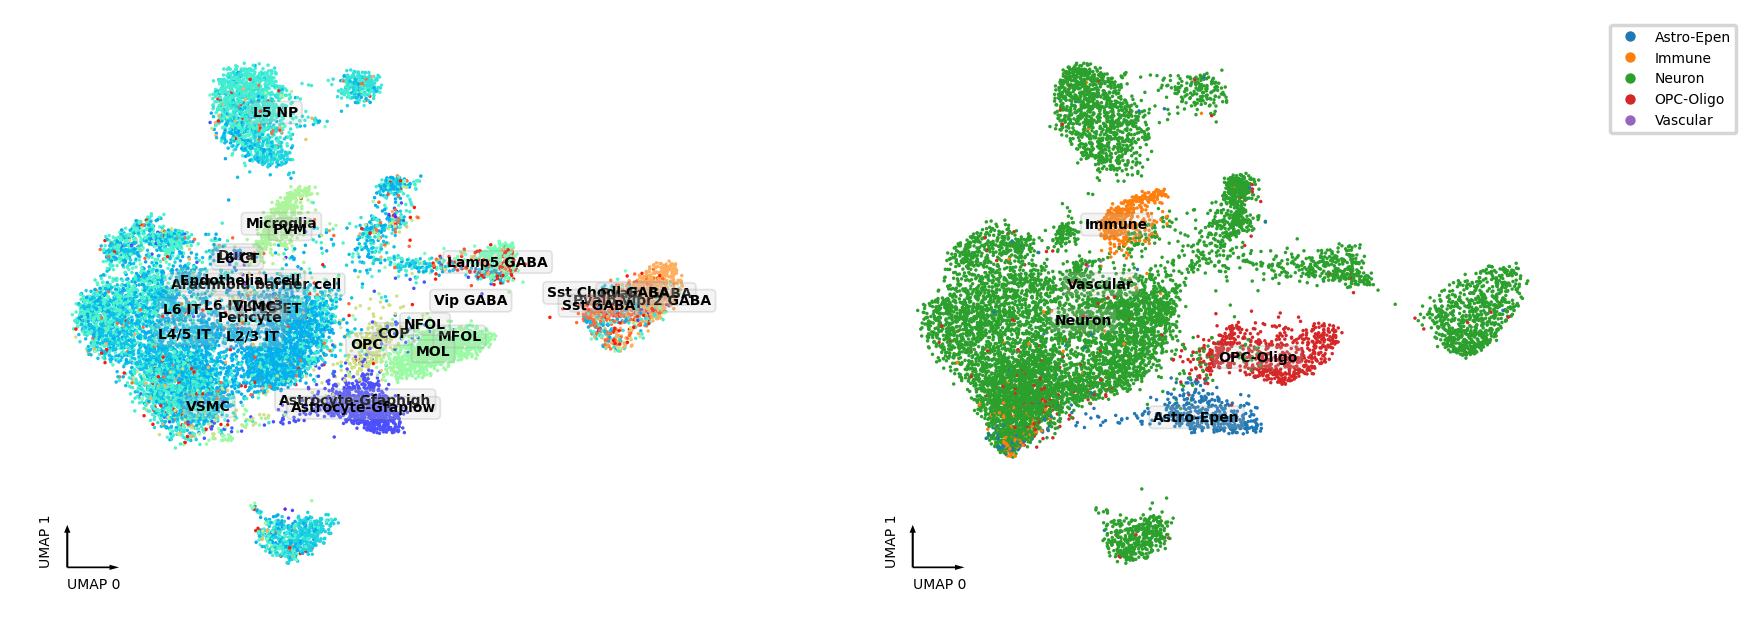

In [191]:
fig, axes = plt.subplots(figsize=(8, 3), dpi=250, ncols=2)

data = adata_concat.obs[adata_concat.obs['batch'] == 'sc'].copy()
#data['MajorType'] = data['SubType'].str.split('_').str[-1]
data2 = adata_concat.obs[adata_concat.obs['batch'] == 'atac'].copy()


ax = axes[0]
categorical_scatter(ax=ax,
                    data=data,
                    show_legend=False,
                    max_points=None,
                    hue='celltype.L2',
                    text_anno='celltype.L2',
                    s=1)

ax = axes[1]
categorical_scatter(ax=ax,
                    data=data2,
                    hue='celltype.L1',
                    show_legend=True,
                    text_anno='celltype.L1',

                    max_points=None,
                    s=1)

In [189]:
data2.columns

Index(['sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'doublet_score', 'predicted_doublet',
       'batch', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'pred_dmb',
       'pred_mwb', 'pred_mdg', 'pred_mih', 'pred_mpd', 'sampleID', 'tech',
       'louvain', 'pred_Class', 'cell', 'mCCCFrac', 'mCGFrac', 'mCHFrac',
       'FinalmCReads', 'DissectionRegion', 'Plate', 'Col384', 'Row384',
       'Slice', 'Sample', 'Technology', 'InputReads', 'PassBasicQC',
       'PlateNormCov', 'CEMBARegion', 'MajorRegion', 'SubRegion', 'CellGroup',
       'SubClass', 'Class', 'NeuroTransmitters', 'mc_all_tsne_0',
       'mc_all_tsne_1', 'mc_all_umap_0', 'mc_all_umap_1', 'mr_tsne_0',
       'mr_tsne_1', 'mr_tsne_0.1', 'mr_tsne_1.1', 'orig.ident', 'nCount_peaks',
       'nFeature_peaks', 'total', 'duplicate',

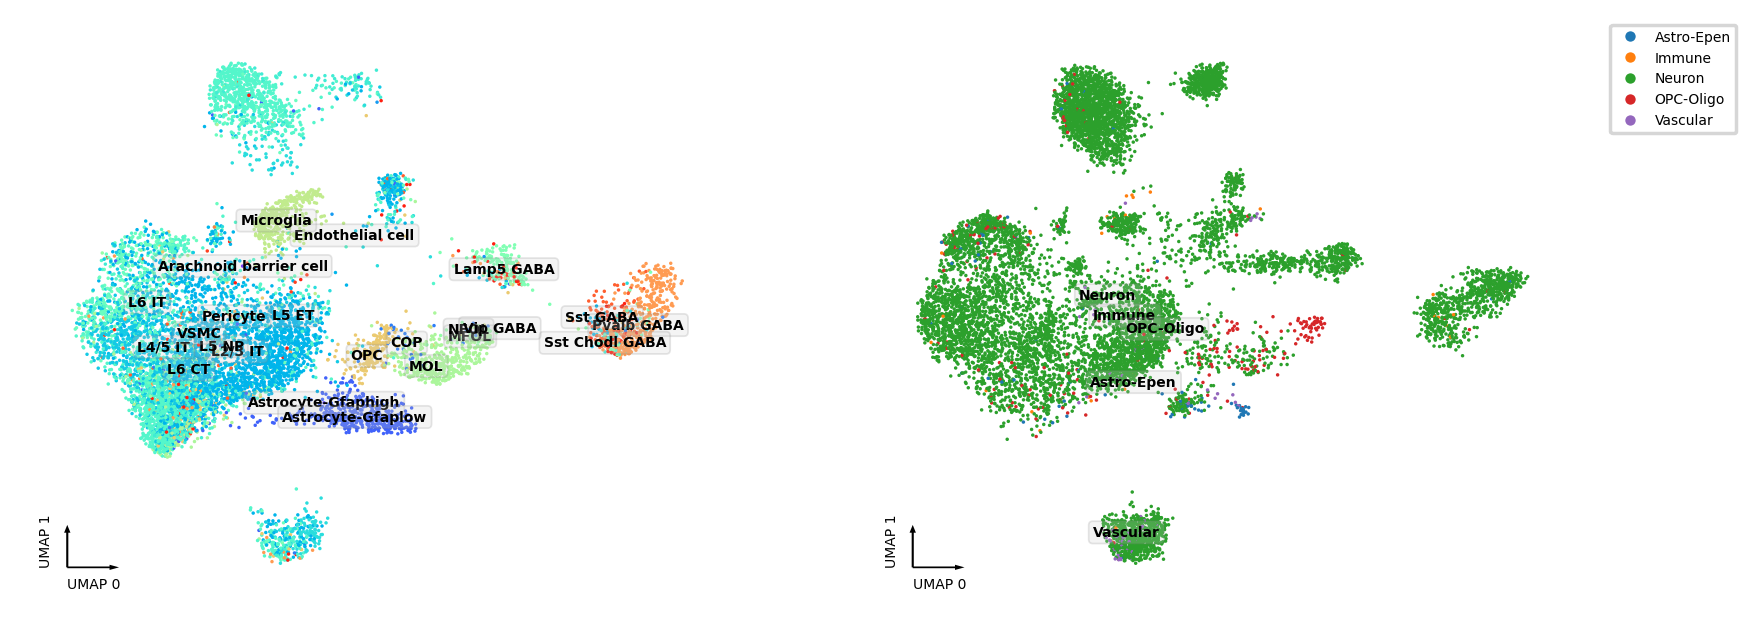

In [ ]:
fig, axes = plt.subplots(figsize=(8, 3), dpi=250, ncols=2)

data = adata_concat.obs[adata_concat.obs['batch'] == 'atac'].copy()
#data['MajorType'] = data['SubType'].str.split('_').str[-1]
data2 = adata_concat.obs[adata_concat.obs['batch'].isin(['mcg','mch'])].copy()


ax = axes[0]
categorical_scatter(ax=ax,
                    data=data,
                    show_legend=False,
                    max_points=None,
                    hue='celltype.L2',
                    text_anno='celltype.L2',
                    s=1)

ax = axes[1]
categorical_scatter(ax=ax,
                    data=data2,
                    hue='celltype.L1',
                    show_legend=True,
                    text_anno='celltype.L1',

                    max_points=None,
                    s=1)

In [192]:
adata_concat.write_h5ad('output/merged-all-pfc-annotated.h5ad')


In [193]:
adata_concat.obs.to_csv('output/merged-all-pfc-annotated.csv')